Dataset Shape: (16599, 6)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16599 entries, 0 to 16598
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   States     16599 non-null  object 
 1   Regions    16599 non-null  object 
 2   latitude   16599 non-null  float64
 3   longitude  16599 non-null  float64
 4   Dates      16599 non-null  object 
 5   Usage      16599 non-null  float64
dtypes: float64(3), object(3)
memory usage: 778.2+ KB

Summary Statistics:
           latitude     longitude         Usage
count  16599.000000  16599.000000  16599.000000
mean      23.178220     81.794533    103.001862
std        6.146575      7.258429    116.044056
min        8.900373     71.192400      0.300000
25%       19.820430     76.569993      6.700000
50%       23.835404     78.570026     64.400000
75%       27.333330     88.329947    173.900000
max       33.450000     94.216667    522.100000

Missing Values:
States 

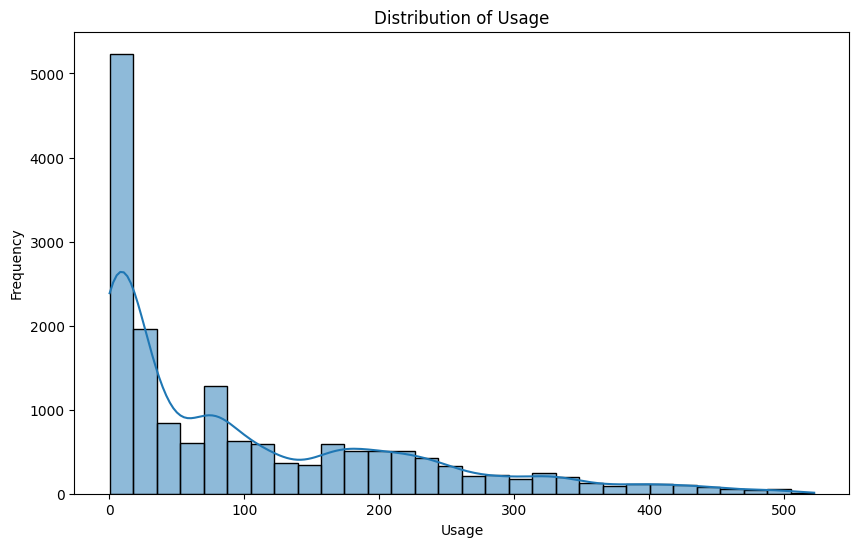

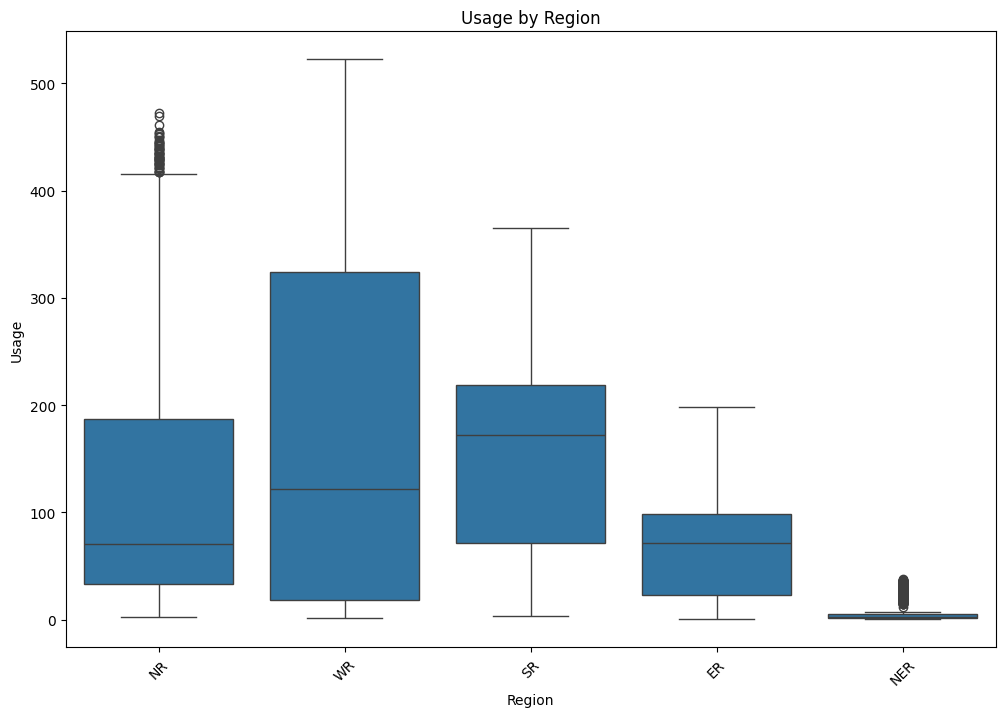

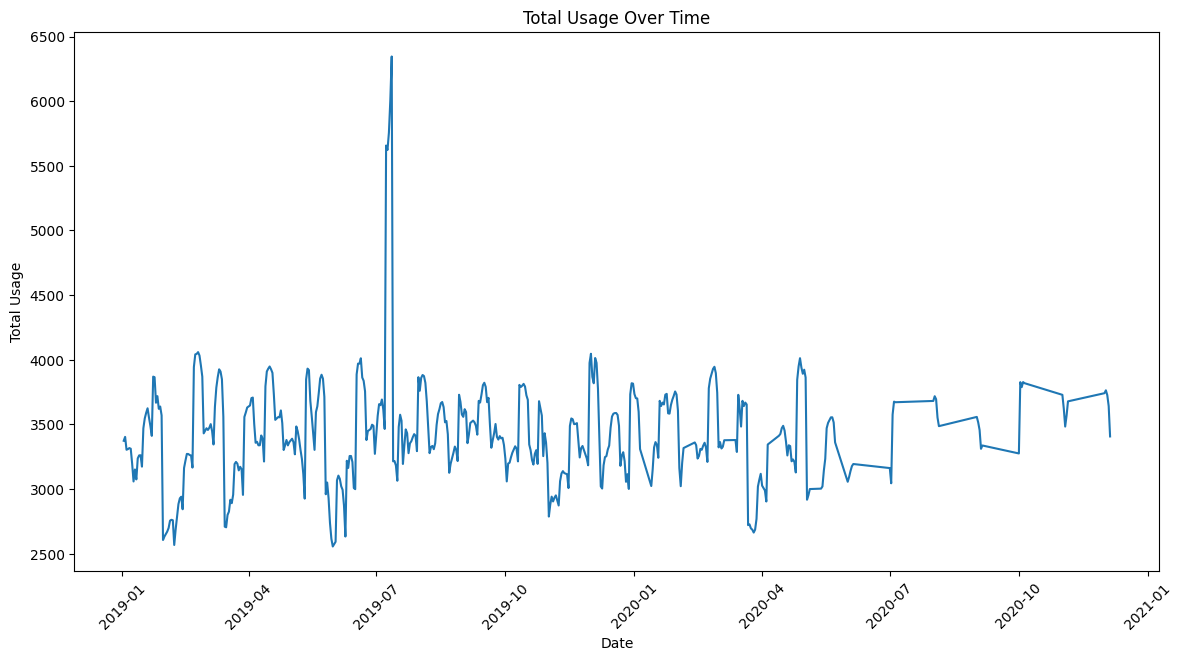

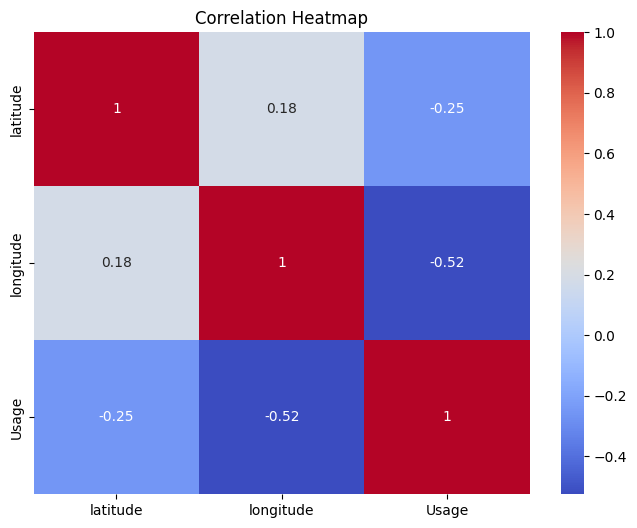


Average Usage by State:
States
Maharashtra          431.570179
Gujarat              323.039563
UP                   314.036382
Tamil Nadu           300.738569
Rajasthan            218.443340
MP                   208.283101
Karnataka            204.106759
Telangana            187.008549
Andhra Pradesh       176.151889
Punjab               141.145527
West Bengal          138.708151
Haryana              138.333598
Chhattisgarh          83.877137
Delhi                 83.380716
Bihar                 83.159443
Odisha                80.464612
Kerala                72.192445
J&K                   44.264016
Uttarakhand           36.161155
HP                    26.568191
Assam                 24.960040
Jharkhand             23.842545
DNH                   16.430616
Goa                   11.093241
Pondy                  7.473108
Meghalaya              5.646813
Chandigarh             4.141551
Tripura                4.089022
Manipur                2.494632
Nagaland               2.163273
Arunacha

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('long_data_.csv')

# Basic information
print("Dataset Shape:", data.shape)
print("\nDataset Info:")
data.info()
print("\nSummary Statistics:")
print(data.describe())

# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())

# Convert 'Dates' to datetime format
data['Dates'] = pd.to_datetime(data['Dates'], format='%d/%m/%Y %H:%M:%S')

# Handle any potential duplicates
data = data.drop_duplicates()

# Univariate Analysis
# Distribution of Usage
plt.figure(figsize=(10, 6))
sns.histplot(data['Usage'], bins=30, kde=True)
plt.title('Distribution of Usage')
plt.xlabel('Usage')
plt.ylabel('Frequency')
plt.show()

# Boxplot for Usage by Region
plt.figure(figsize=(12, 8))
sns.boxplot(x='Regions', y='Usage', data=data)
plt.title('Usage by Region')
plt.xlabel('Region')
plt.ylabel('Usage')
plt.xticks(rotation=45)
plt.show()

# Time Series Analysis: Total Usage over time
data_time = data.groupby('Dates')['Usage'].sum().reset_index()
plt.figure(figsize=(14, 7))
plt.plot(data_time['Dates'], data_time['Usage'])
plt.title('Total Usage Over Time')
plt.xlabel('Date')
plt.ylabel('Total Usage')
plt.xticks(rotation=45)
plt.show()

# Correlation Analysis (numerical features)
numerical_data = data[['latitude', 'longitude', 'Usage']]
corr = numerical_data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Group by States and calculate mean Usage
state_usage = data.groupby('States')['Usage'].mean().sort_values(ascending=False)
print("\nAverage Usage by State:")
print(state_usage)

# Group by Regions and calculate mean Usage
region_usage = data.groupby('Regions')['Usage'].mean().sort_values(ascending=False)
print("\nAverage Usage by Region:")
print(region_usage)
